In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
munro = pd.read_csv('datasets/clean.csv')
munro.head()

,name,altitude,ascent_count,rating,region,report_count,rating_count,bb_count,hotel_count,hostel_count,...,neighbor_count_10,neighbor_count_15,neighbor_count_20,nearest_city_dist,nearest_city_population,nearest_large_city_dist,population_25,population_50,population_75,population_100
0,Ben Nevis,1345,17902,3.84,Fort William,316,253,72,41,18,...,16,20,29,6.68,10459,89.19,10459,10459,19034,242223
1,Ben Macdui,1309,10449,3.78,Cairngorms,215,162,37,29,9,...,14,17,20,56.26,70000,56.26,0,0,158093,762982
2,Braeriach,1296,6035,3.95,Cairngorms,141,94,37,29,9,...,12,16,20,53.49,70000,53.49,0,0,150894,762982
3,Cairn Toul,1291,5121,3.86,Cairngorms,136,83,37,29,9,...,14,18,21,56.30,70000,56.30,0,0,205053,771982
4,Sgor an Lochain Uaine,1258,4832,3.83,Cairngorms,139,79,37,29,9,...,13,18,20,55.43,70000,55.43,0,0,158093,771982


In [3]:
relevant_cols = [ 'altitude','rating_count','bb_count','hostel_count','cottage_count','camping_count', 
    'neighbor_count_1', 'neighbor_count_2.5', 'neighbor_count_5', 'neighbor_count_10', 'neighbor_count_15',
    'neighbor_count_20', 'nearest_city_dist', 'nearest_city_population', 'nearest_large_city_dist', 
    'population_25', 'population_50', 'population_75', 'population_100']
munro_subset = munro[relevant_cols]
munro_subset.head()

,altitude,rating_count,bb_count,hostel_count,cottage_count,camping_count,neighbor_count_1,neighbor_count_2.5,neighbor_count_5,neighbor_count_10,neighbor_count_15,neighbor_count_20,nearest_city_dist,nearest_city_population,nearest_large_city_dist,population_25,population_50,population_75,population_100
0,1345,253,72,18,147,147,0,1,5,16,20,29,6.68,10459,89.19,10459,10459,19034,242223
1,1309,162,37,9,182,182,0,0,7,14,17,20,56.26,70000,56.26,0,0,158093,762982
2,1296,94,37,9,182,182,0,1,3,12,16,20,53.49,70000,53.49,0,0,150894,762982
3,1291,83,37,9,182,182,0,2,6,14,18,21,56.30,70000,56.30,0,0,205053,771982
4,1258,79,37,9,182,182,0,2,6,13,18,20,55.43,70000,55.43,0,0,158093,771982


In [4]:
munro_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   altitude                 282 non-null    int64  
 1   rating_count             282 non-null    int64  
 2   bb_count                 282 non-null    int64  
 3   hostel_count             282 non-null    int64  
 4   cottage_count            282 non-null    int64  
 5   camping_count            282 non-null    int64  
 6   neighbor_count_1         282 non-null    int64  
 7   neighbor_count_2.5       282 non-null    int64  
 8   neighbor_count_5         282 non-null    int64  
 9   neighbor_count_10        282 non-null    int64  
 10  neighbor_count_15        282 non-null    int64  
 11  neighbor_count_20        282 non-null    int64  
 12  nearest_city_dist        282 non-null    float64
 13  nearest_city_population  282 non-null    int64  
 14  nearest_large_city_dist  2

In [5]:
scaler = StandardScaler()
scaled_munro = pd.DataFrame(scaler.fit_transform(munro_subset), index = munro_subset.index, columns = munro_subset.columns)

PC1 explains 24% of the variance.
PC2 explains 16% of the variance.
PC3 explains 15% of the variance.
PC4 explains 11% of the variance.
PC5 explains 9% of the variance.
PC6 explains 5% of the variance.
PC7 explains 4% of the variance.
PC8 explains 3% of the variance.
PC9 explains 3% of the variance.
PC10 explains 3% of the variance.
PC11 explains 2% of the variance.
PC12 explains 1% of the variance.
PC13 explains 1% of the variance.
PC14 explains 1% of the variance.
PC15 explains 1% of the variance.
PC16 explains 1% of the variance.
PC17 explains 0% of the variance.
PC18 explains 0% of the variance.
PC19 explains 0% of the variance.


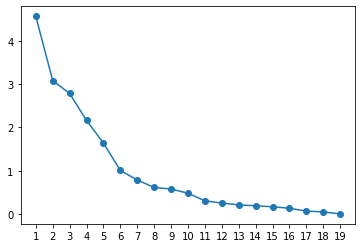

In [6]:
pca = PCA(n_components = len(scaled_munro.columns)).fit(scaled_munro)
# eigenvalues
eigenvalue = (pca.explained_variance_)
plt.plot(list(range(1, len(eigenvalue)+1)), eigenvalue, '-o')
plt.xticks(list(range(1, len(eigenvalue)+1)))
# eigenvectors
# print(pca.components_)
for i in range(len(eigenvalue)):
    print('PC' + str(i+1) + ' explains ' + str(round((eigenvalue[i] / np.sum(eigenvalue))*100)) + '% of the variance.')

In [7]:
munro.head()

,name,altitude,ascent_count,rating,region,report_count,rating_count,bb_count,hotel_count,hostel_count,...,neighbor_count_10,neighbor_count_15,neighbor_count_20,nearest_city_dist,nearest_city_population,nearest_large_city_dist,population_25,population_50,population_75,population_100
0,Ben Nevis,1345,17902,3.84,Fort William,316,253,72,41,18,...,16,20,29,6.68,10459,89.19,10459,10459,19034,242223
1,Ben Macdui,1309,10449,3.78,Cairngorms,215,162,37,29,9,...,14,17,20,56.26,70000,56.26,0,0,158093,762982
2,Braeriach,1296,6035,3.95,Cairngorms,141,94,37,29,9,...,12,16,20,53.49,70000,53.49,0,0,150894,762982
3,Cairn Toul,1291,5121,3.86,Cairngorms,136,83,37,29,9,...,14,18,21,56.30,70000,56.30,0,0,205053,771982
4,Sgor an Lochain Uaine,1258,4832,3.83,Cairngorms,139,79,37,29,9,...,13,18,20,55.43,70000,55.43,0,0,158093,771982


In [8]:
knee = 6
pc_scores = [f'PCm{i+1}' for i in range(knee)]

# PCA
pca = PCA(n_components=6)
pca_out = pca.fit_transform(scaled_munro)

# Styling
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    def _highlight(val):
        if abs(val) in max_:
            if val >= 0:
                return 'background-color: green'
            else:
                return 'background-color: orange'
        return ''
    max_ = s.abs().nlargest(10).values
    return [_highlight(v) for v in s]

# Dump components relations with features:
pd.DataFrame(pca.components_, columns=scaled_munro.columns, index=pc_scores).T.style.apply(highlight_max)

,PCm1,PCm2,PCm3,PCm4,PCm5,PCm6
altitude,-0.110933,0.100956,-0.083057,-0.008001,0.481474,-0.067495
rating_count,0.225023,0.283883,-0.001603,0.271060,0.199524,-0.012226
bb_count,-0.158850,0.423489,0.089981,-0.069245,-0.166513,-0.292518
hostel_count,-0.275409,0.370651,0.100302,-0.146396,-0.161042,0.012400
cottage_count,-0.270215,0.235291,0.329948,-0.075523,0.208076,-0.061538
camping_count,-0.270215,0.235291,0.329948,-0.075523,0.208076,-0.061538
neighbor_count_1,-0.179908,-0.125923,0.235749,0.432556,-0.119859,-0.018641
neighbor_count_2.5,-0.233412,-0.085513,0.058591,0.475537,-0.020890,0.121615
neighbor_count_5,-0.298916,-0.097384,-0.081706,0.396719,0.131805,0.021538
neighbor_count_10,-0.315015,-0.065207,-0.331948,0.115718,0.196226,0.031312


In [9]:
# PC1 = "remoteness" - number of accom. facilities, neighboring munros and proximity to a large city have a large negative effect
# PC2 = "civilisation" - positive effect: number of accom. facilities, rating, proximity to cities
# PC3 = "compactness / ...aww" - positive effect: number of accom. facilities, number of munros within 1km, distance to nearest city and its population
# PC4 = " " - 
# PC5 = "mountainousness" - positive effect: altitude, rating_count, cottage/camping (more suitable / affordable for mountaineers?)
# PC6 = 

In [10]:
# TODO: name PC scores
# TODO: add data about regions, county - not PCA, but before we run linear regression

In [11]:
# Source: https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

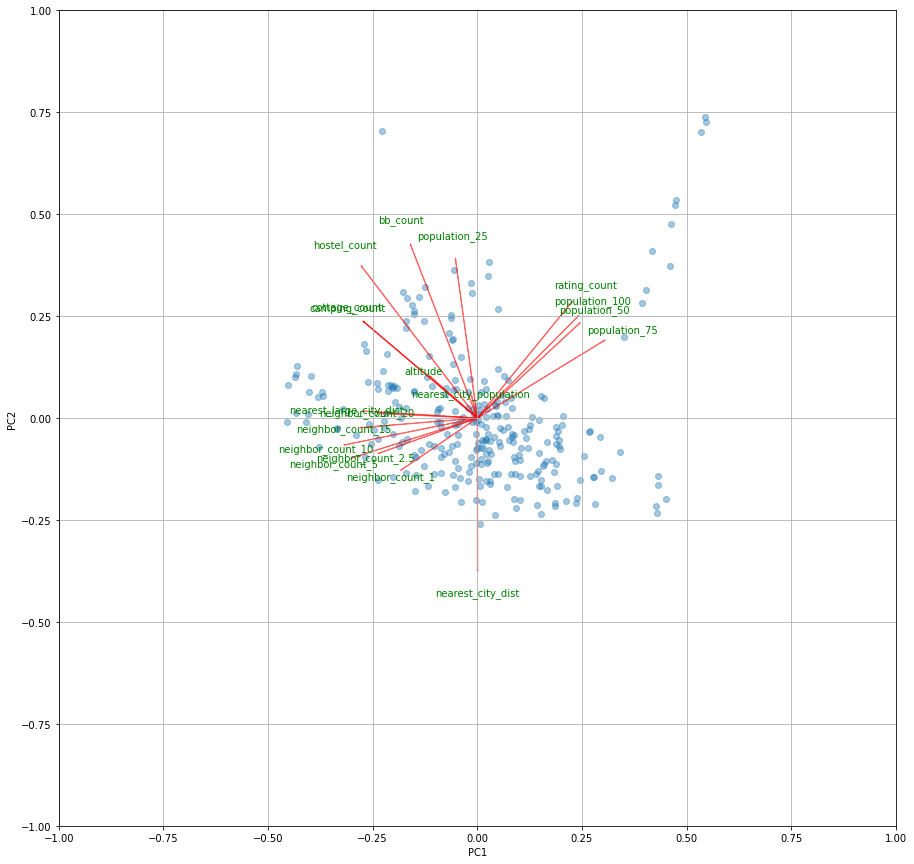

In [12]:
# Adapted from "searlouk"'s post: https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
def myplot(score,coeff,labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(15,15))
    plt.scatter(xs * scalex,ys * scaley, alpha=0.4)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_out[:,2:4],np.transpose(pca.components_[0:2, :]), labels=munro_subset.columns)
plt.show()

[[-2.21877201  3.93289608 -1.64097771  0.65229063  1.66535767  0.63511658]
 [-1.18880618  0.64563367  1.08001304 -0.15982204  5.87823031  0.94594279]
 [-0.99426346  0.39143397  1.40572501 -0.92593198  5.20022522  1.08139267]
 ...
 [ 2.40519095  0.77790305 -0.15517426  0.83786715 -0.44136079 -1.47328881]
 [-0.04976901  1.18930019  1.30430442 -2.0715022  -1.38609884 -0.20371309]
 [ 4.89246683  1.36416509 -0.5707785   1.85521723  0.26100745 -0.37746269]]


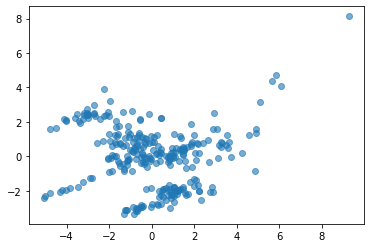

In [13]:
pca_result = pca.transform(scaled_munro)
print(pca_result)
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.6)

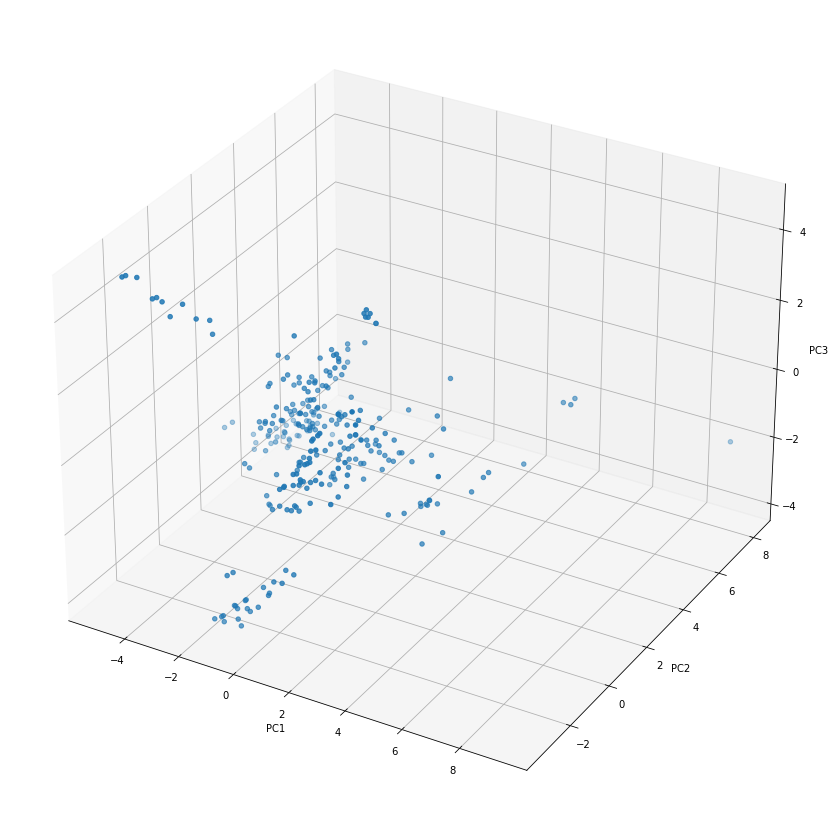

In [14]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

<AxesSubplot:>

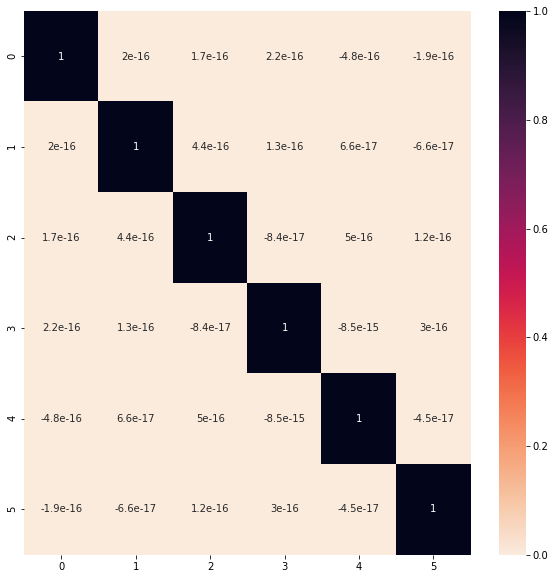

In [18]:
# Sanity check that PCA components are uncorrelateds
apca_data = pd.DataFrame(data=pca_result)
plt.figure(figsize=(10,10))
sns.heatmap(pca_data.corr(), annot=True, cmap=sns.cm.rocket_r)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ad6e5521-2329-4ba2-9ce8-c0f71fb15c68' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>